In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Electric_Vehicle_Population_Data.csv"  # Updated to CSV
df = pd.read_csv(file_path)  # Load sample for performance
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [3]:
# Task 1: Dataset Overview
print("\n--- Dataset Overview ---")
num_rows, num_columns = df.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Identifying Column Types
column_types = df.dtypes
print("\n--- Column Data Types ---")
print(column_types)


--- Dataset Overview ---
Total Rows: 232230, Total Columns: 17

--- Column Data Types ---
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      o

In [4]:
# Missing Values and Unique Values

# Missing Values Analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_rows) * 100
missing_data_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
print("\n--- Missing Data Summary ---")
print(missing_data_summary)

numeric_summary = df.describe().T
print("\n--- Numeric Column Summary ---")
print(numeric_summary)

# Unique Value Counts for Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = {col: df[col].nunique() for col in categorical_columns}
categorical_summary_df = pd.DataFrame(list(categorical_summary.items()), columns=['Column', 'Unique Values'])
print("\n--- Categorical Column Summary ---")
print(categorical_summary_df)


--- Missing Data Summary ---
                                                                                              Column  \
VIN (1-10)                                                                                VIN (1-10)   
County                                                                                        County   
City                                                                                            City   
State                                                                                          State   
Postal Code                                                                              Postal Code   
Model Year                                                                                Model Year   
Make                                                                                            Make   
Model                                                                                          Model   
Electric Vehicle Type             


 Task 2: Temporal Analysis

Yearly Trends in Electric Vehicle Registrations:
     Model Year  Number of Vehicles
0         1999                   2
1         2000                   7
2         2002                   2
3         2003                   1
4         2008                  22
5         2010                  23
6         2011                 692
7         2012                1523
8         2013                4263
9         2014                3432
10        2015                4688
11        2016                5375
12        2017                8551
13        2018               14298
14        2019               10965
15        2020               12248
16        2021               20565
17        2022               28930
18        2023               59808
19        2024               47920
20        2025                8915


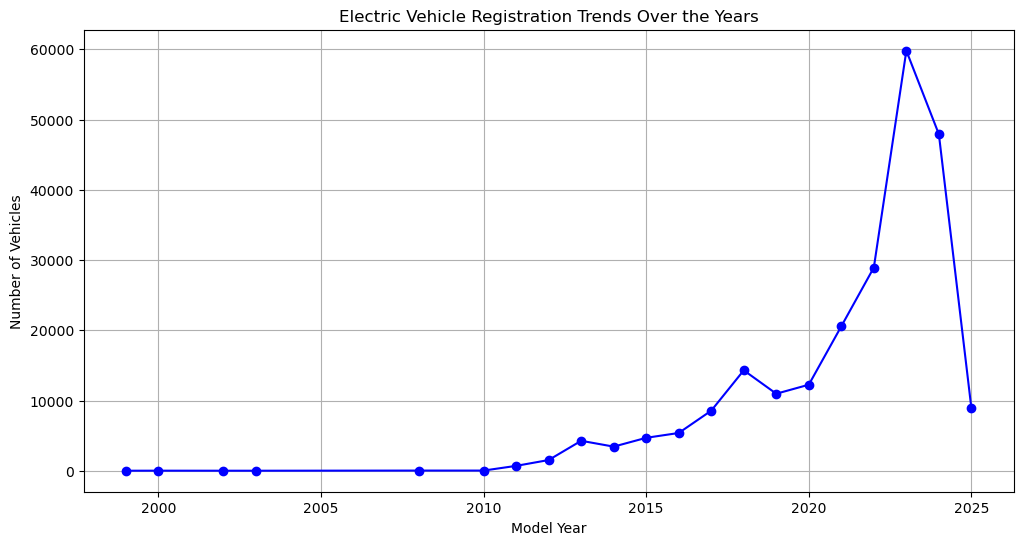

In [5]:
# Task 2 - Temporal Analysis
print("\n Task 2: Temporal Analysis")

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Convert Model Year to numeric
df["Model Year"] = pd.to_numeric(df["Model Year"], errors="coerce")

# Yearly registration trends
yearly_trends = df["Model Year"].value_counts().sort_index()
yearly_trends_df = yearly_trends.reset_index()
yearly_trends_df.columns = ["Model Year", "Number of Vehicles"]
print("\nYearly Trends in Electric Vehicle Registrations:\n", yearly_trends_df)

# Plot trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends_df["Model Year"], yearly_trends_df["Number of Vehicles"], marker="o", linestyle="-", color="b")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.title("Electric Vehicle Registration Trends Over the Years")
plt.grid(True)
plt.show()


 Task 3: Data Distribution Analysis


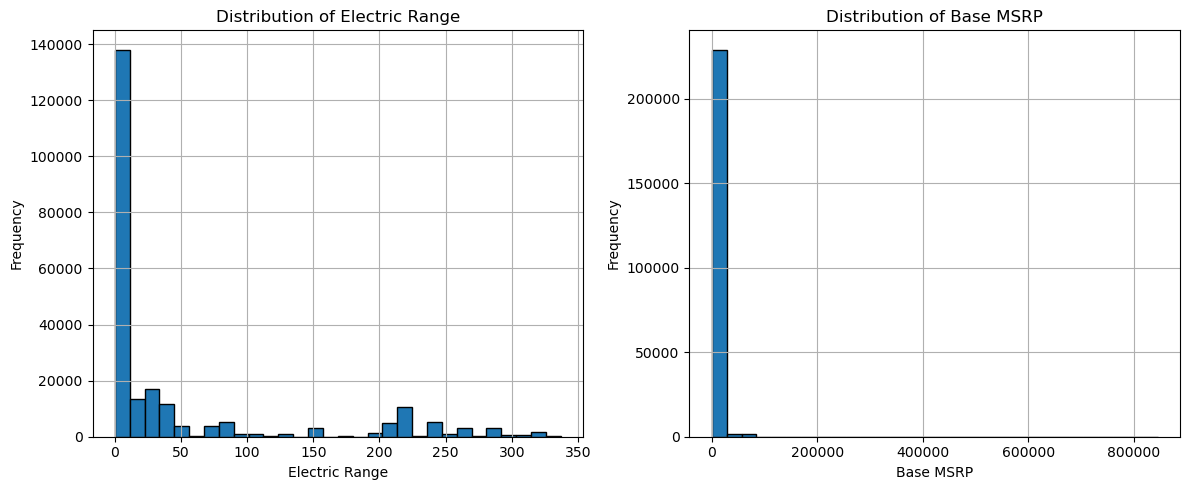


Summary Statistics of Key Numeric Attributes:
                    count        mean          std  min  25%  50%   75%  \
Electric Range  232203.0   46.755998    84.373596  0.0  0.0  0.0  38.0   
Base MSRP       232203.0  803.808973  7246.597102  0.0  0.0  0.0   0.0   

                     max  
Electric Range     337.0  
Base MSRP       845000.0  


In [6]:
# Task 3 - Data Distribution Analysis

print("\n Task 3: Data Distribution Analysis")

# Selecting numeric columns for distribution
numeric_columns = ["Electric Range", "Base MSRP"]

# Plot histograms
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, i)
    df[col].dropna().hist(bins=30, edgecolor="black")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Display numeric summary
print("\nSummary Statistics of Key Numeric Attributes:\n", df[numeric_columns].describe().T)



 Task 4: Supporting Visualizations

Top 10 EV Manufacturers:
         Make  Number of Vehicles
0      TESLA               99692
1  CHEVROLET               16919
2     NISSAN               15457
3       FORD               12461
4        KIA               11224
5        BMW                9505
6     TOYOTA                9265
7    HYUNDAI                7218
8     RIVIAN                6712
9       JEEP                5920


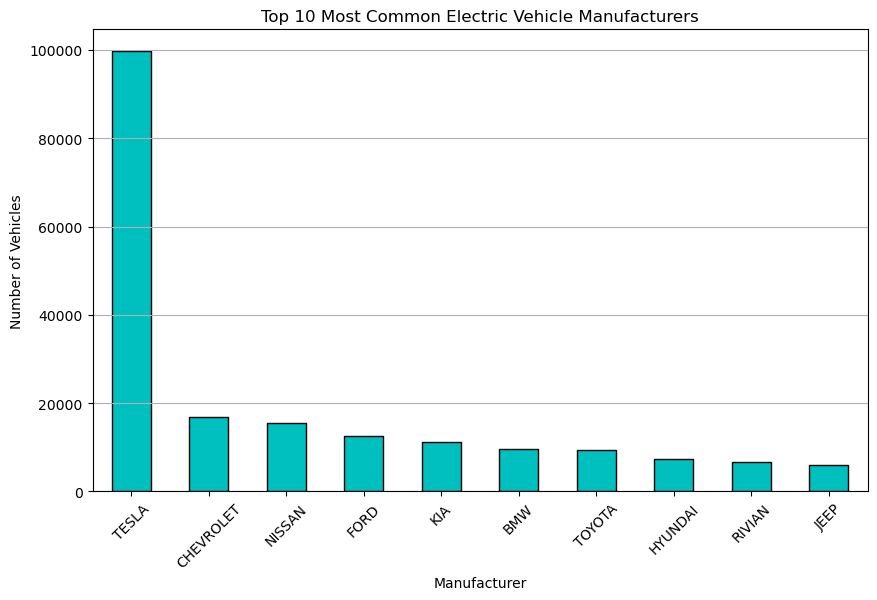

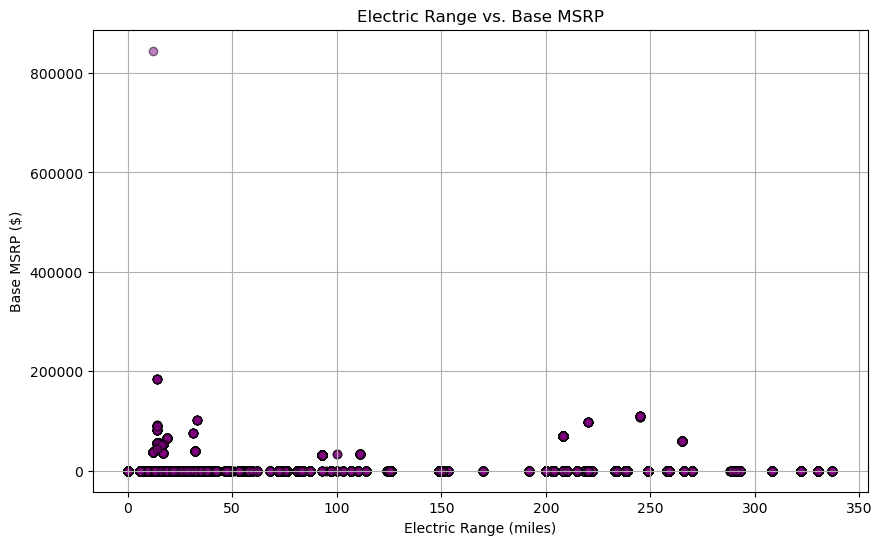

In [7]:
# Task 4: Supporting Visualizations
print("\n Task 4: Supporting Visualizations")

# Top 10 EV manufacturers
top_makes = df["Make"].value_counts().head(10)
top_makes_df = top_makes.reset_index()
top_makes_df.columns = ["Make", "Number of Vehicles"]
print("\nTop 10 EV Manufacturers:\n", top_makes_df)

# Plot manufacturer distribution
plt.figure(figsize=(10, 6))
top_makes.plot(kind="bar", color="c", edgecolor="black")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 Most Common Electric Vehicle Manufacturers")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Scatter plot: Electric Range vs. Base MSRP
plt.figure(figsize=(10, 6))
plt.scatter(df["Electric Range"], df["Base MSRP"], alpha=0.5, color="purple", edgecolors="black")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Base MSRP ($)")
plt.title("Electric Range vs. Base MSRP")
plt.grid(True)
plt.show()


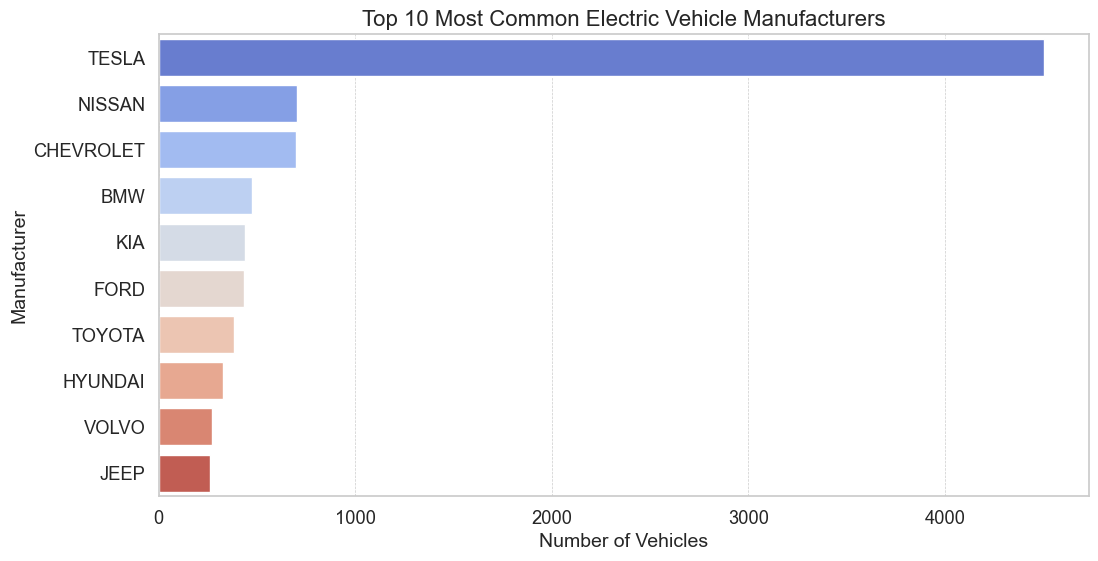

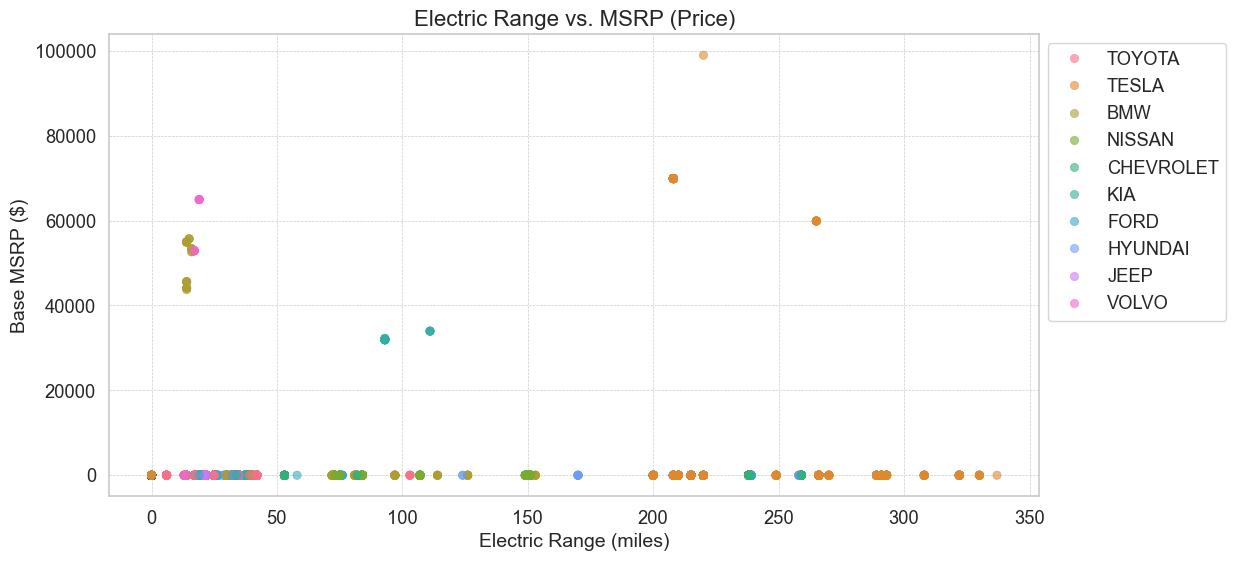

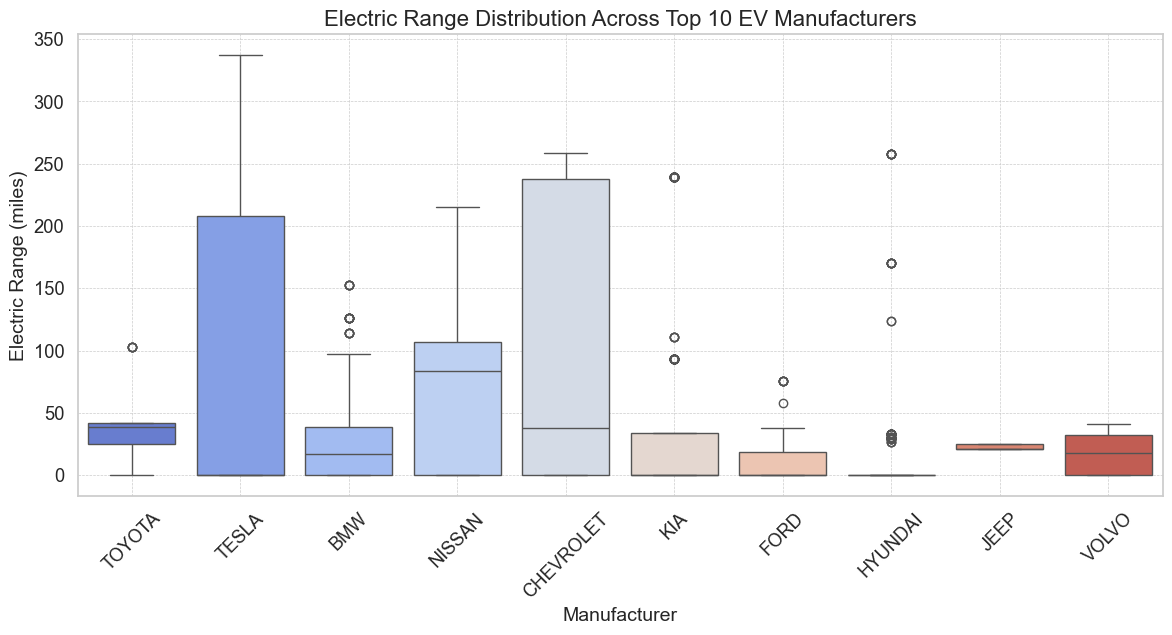

In [28]:

plt.figure(figsize=(12, 6))
top_makes = df["Make"].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, hue=top_makes.index, palette="coolwarm", legend=False)
plt.xlabel("Number of Vehicles", fontsize=14)
plt.ylabel("Manufacturer", fontsize=14)
plt.title("Top 10 Most Common Electric Vehicle Manufacturers", fontsize=16)
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(12, 6))
df["Make"] = df["Make"].astype(str)  # Ensure 'Make' is string type
df_filtered = df[df["Make"].isin(df["Make"].value_counts().head(10).index)].copy()  # Fix warning
sns.scatterplot(data=df_filtered, x="Electric Range", y="Base MSRP", hue="Make",
                alpha=0.6, palette="husl", edgecolor=None)  # Fixes warnings
plt.xlabel("Electric Range (miles)", fontsize=14)
plt.ylabel("Base MSRP ($)", fontsize=14)
plt.title("Electric Range vs. MSRP (Price)", fontsize=16)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(14, 6))
top_10_makes = df["Make"].value_counts().head(10).index
df_filtered = df[df["Make"].isin(top_10_makes)].copy()  # Fix warning
sns.boxplot(x="Make", y="Electric Range", hue="Make", data=df_filtered, palette="coolwarm", legend=False)
plt.xlabel("Manufacturer", fontsize=14)
plt.ylabel("Electric Range (miles)", fontsize=14)
plt.title("Electric Range Distribution Across Top 10 EV Manufacturers", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


In [30]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import dash
from dash import dcc, html
import dash.dependencies as dd
import pandas as pd
import plotly.express as px
import warnings

# Load dataset
file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Convert Model Year to numeric
df["Model Year"] = pd.to_numeric(df["Model Year"], errors="coerce")

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the Dashboard
app.layout = html.Div([
    html.H1("Electric Vehicle Dashboard", style={'textAlign': 'center'}),

    # Filters
    html.Div([
        html.Label("Select Model Year:"),
        dcc.RangeSlider(
            id="year-slider",
            min=df["Model Year"].min(),
            max=df["Model Year"].max(),
            value=[2015, 2023],  # Default range
            marks={int(year): str(int(year)) for year in df["Model Year"].unique() if pd.notna(year)},
            step=1
        ),
        
        html.Label("Select Manufacturer:"),
        dcc.Dropdown(
            id="make-dropdown",
            options=[{"label": make, "value": make} for make in df["Make"].unique()],
            value=["TESLA", "NISSAN"],  # Default selections
            multi=True
        ),
    ], style={'width': '50%', 'margin': 'auto'}),

    # Charts
    html.Div([
        dcc.Graph(id="time-series"),
        dcc.Graph(id="top-makes"),
        dcc.Graph(id="scatter-range-price"),
        dcc.Graph(id="histogram-range")
    ]),

    # Summary Statistics
    html.Div([
        html.H3("Summary Statistics"),
        html.Div(id="summary-stats")
    ], style={'textAlign': 'center', 'marginTop': '20px'}),

])

# Callback to update charts dynamically based on filters
@app.callback(
    [
        dd.Output("time-series", "figure"),
        dd.Output("top-makes", "figure"),
        dd.Output("scatter-range-price", "figure"),
        dd.Output("histogram-range", "figure"),
        dd.Output("summary-stats", "children")
    ],
    [
        dd.Input("year-slider", "value"),
        dd.Input("make-dropdown", "value")
    ]
)
def update_dashboard(selected_year, selected_makes):
    filtered_df = df[(df["Model Year"] >= selected_year[0]) & (df["Model Year"] <= selected_year[1])]
    filtered_df = filtered_df[filtered_df["Make"].isin(selected_makes)]

    # Time Series Plot: EV Registrations Over Time
    yearly_trends = filtered_df["Model Year"].value_counts().sort_index()
    fig1 = px.line(x=yearly_trends.index, y=yearly_trends.values, markers=True,
                   labels={"x": "Year", "y": "Number of EVs"},
                   title="Yearly Trend of EV Registrations")

    # Bar Chart: Top 10 EV Manufacturers
    top_makes = filtered_df["Make"].value_counts().head(10)
    fig2 = px.bar(x=top_makes.index, y=top_makes.values,
                  labels={"x": "Manufacturer", "y": "Number of Vehicles"},
                  title="Top 10 Most Popular EV Manufacturers",
                  color=top_makes.index)

    # Scatter Plot: Electric Range vs. Base MSRP
    fig3 = px.scatter(filtered_df, x="Electric Range", y="Base MSRP", color="Make",
                      title="Electric Range vs. Base MSRP",
                      labels={"Electric Range": "Range (miles)", "Base MSRP": "Price ($)"},
                      hover_data=["Model Year", "Make"])

    # Histogram: Distribution of Electric Range
    fig4 = px.histogram(filtered_df, x="Electric Range", nbins=30, title="Distribution of Electric Range",
                        labels={"Electric Range": "Range (miles)"}, color_discrete_sequence=["green"])

    # Summary Statistics
    summary = [
        html.P(f"Total EV Models: {len(filtered_df['Make'].unique())}"),
        html.P(f"Average Electric Range: {round(filtered_df['Electric Range'].mean(), 1)} miles"),
        html.P(f"Average MSRP: ${round(filtered_df['Base MSRP'].mean(), 2)}")
    ]

    return fig1, fig2, fig3, fig4, summary

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

warnings.simplefilter(action='ignore', category=FutureWarning)